<a href="https://colab.research.google.com/github/HimaliShewale/Python/blob/main/Linear_Regression_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Linear Regression and Gradient Descent


## Collaboration Policy

This is a group assignment. Please list the names of group members below.

**Collaborators**:
1. Himali Shewale
2. Dhrumil Buch
3. Sharad Parmar

## Scoring Breakdown

|Question|Points|
|---|---|
|1.a|10|
|1.b|10|
|2.a|10|
|2.b|10|
|2.c|10|
|2.d|10|
|2.e|10|
|3.a|20|
|3.b|10|
|**Total**|100|

## Question 1.
Suppose we create a linear model with parameters $\vec{\hat{\beta}}=[\hat{\beta}_0,...,\hat{\beta}_p]$
As we saw in lecture, such a model makes predictions $\hat{y}=\vec{\hat{\beta}}.\vec{x}=\sum{\hat{\beta}_ix_i}$


### 1.a.
Suppose $\vec{\hat{\beta}}=[1,2,1]$ and e receive an observation $x = [4, 2, 1]$. What $\hat{y}$ value will
this model predict for the given observation?

9

### 1.b.
Suppose the correct $y$ was 6.1. What will be the L2 loss for our prediction $\hat{y}$ from question 1.a?

8.41

## Question 2.

The following function generates the dataset you need for the rest of the questions

In [ ]:
import numpy as np
import pandas as pd
# This function helps generate a synthesized dataset based on a given gamma value
def generate_dataset(gamma, std=1, num_samples=100, with_intercept=True):
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std
    intercept = -int(with_intercept) * 2
    Y = gamma * X + intercept + e
    #X=X.reshape(-1, 1)
    #Y=Y.reshape(-1, 1)
    data=pd.DataFrame({'X':X, 'Y':Y})
    return data

In [ ]:
# Example:
data = generate_dataset(gamma=10)
data

,X,Y
0,0.315045,2.609965
1,0.957181,6.272757
2,0.766703,4.672872
3,0.128303,-0.597651
4,0.666634,4.045950
...,...,...
95,0.486346,2.534139
96,0.336887,1.442983
97,0.899678,6.800027
98,0.043239,-1.705628


### 2.a.

Using the following functions (gradient descent, mse_loss, and mse_loss_derivative), find the best value of gamma that the gradient descent algorithm can find in 100 iterations for initial gamma=0.1 and $\alpha=0.01$.

In [ ]:
x=data['X']
y_obs=data['Y']

def gradient_descent(df, initial_guess, alpha, n):
    guesses = [initial_guess]
    guess = initial_guess
    while len(guesses) < n:
        guess = guess - alpha * df(guess)
        guesses.append(guess)
    return np.array(guesses)

def mse_loss(gamma):
    y_hat = gamma * x
    return np.mean((y_hat - y_obs) ** 2)

def mse_loss_derivative(gamma):
    y_hat = gamma * x
    return np.mean(2 * (y_hat - y_obs) * x)

In [ ]:
initial_gamma = 0.1
alpha = 0.01
iterations = 100

# gradient descent
gamma_values = gradient_descent(mse_loss_derivative, 0.1, 0.01, 100)

# best value of gamma that the gradient descent
final_gamma = gamma_values[-1]
print(f"The best value of gamma of gradient descent is: {final_gamma}")

The best value of gamma of gradient descent is: 3.4898217716891216


### 2.b.
Create a plot below showing the fitted simple linear regression model on the observed data for when you pick the gamma selected by the above algorithm. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

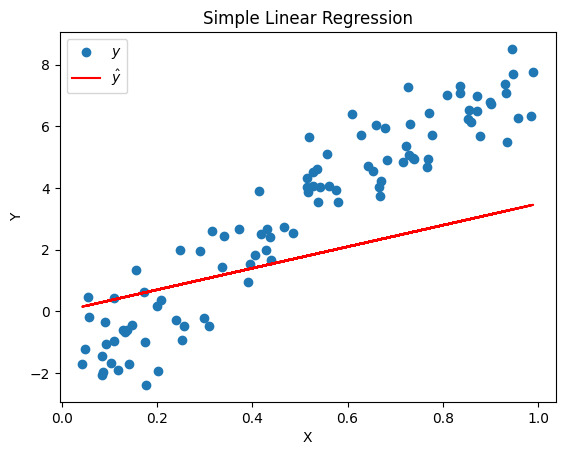

In [ ]:
import matplotlib.pyplot as plt

# scatter plot of all the observed data
plt.scatter(x, y_obs, label='Observed Data')

# Fitted simple linear regression model
gamma_for_plot = final_gamma
y_hat = gamma_for_plot * x

plt.plot(x, y_hat,'r')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend(['$y$','$\hat{y}$' ])
plt.show()


### 2.c.

Use a different value of $\alpha=0.1$ and repeat 2.a and 2.b.


The best value of gamma of gradient descent with 0.1 is: 7.132278734467747


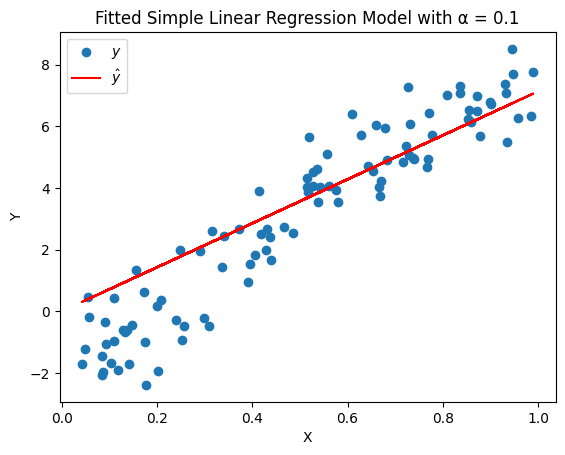

In [ ]:
# Set the initial values with a different alpha
alpha_new = 0.1

# Run gradient descent with the new alpha
gamma_values_new = gradient_descent(mse_loss_derivative, 0.1, 0.1, 100)

# Print the final gamma value
final_gamma_new = gamma_values_new[-1]
print(f"The best value of gamma of gradient descent with is: {final_gamma_new}")

# Scatter plot of observed data
plt.scatter(x, y_obs, label='Observed Data')

# Fitted simple linear regression model with the new gamma
gamma_for_plot_new = final_gamma_new

# Line plot for the simple linear regression model without an intercept with the new gamma
y_hat_new = gamma_for_plot_new * x

plt.plot(x, y_hat_new,'r')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fitted Simple Linear Regression Model with α = 0.1')
plt.legend(['$y$','$\hat{y}$' ])
plt.show()


### 2.d.
Which value of $\alpha$ resulted in a better model? Why?


In this case, the final gamma value (3.49) for α=0.01 is clearly smaller than that of α=0.1 (7.13). Generally speaking, a better-fitting model is indicated by a lower objective function value, in this case, the MSE loss. Thus, based on the provided output, it appears that α=0.01 produced a better model.

## 2.e.

What other inputs of the gradient_descent function can we change to imporove the model?

initial_guess:  It could impact convergence, especially if the loss landscape contains multiple local minima.

Number of iterations (n): Increasing the number of iterations may enable the algorithm to converge to a better solution, but it may also lead to overfitting.

Alpha: instead of using a fixed number of iterations, a convergence criterion based on the variation in the loss or parameters between iterations can be used.

## Question 3.

### 3.a.
Write a calculate_y_hat(X, Y, with_intercept) function that computes the value of y_hat for your model based on whether or not an intercept term is specified within the model.

Hint: Use sklearn.linear_model.LinearRegression library

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

def calculate_y_hat(X, Y, with_intercept=True):


    X = X.values.reshape(-1, 1)
    # Create a linear regression model
    model = LinearRegression(fit_intercept=with_intercept)

    # Fit the model to the data
    model.fit(X,Y)
    model.coef_
    model.intercept_

    # Predict y_hat based on the model
    y_hat = model.intercept_ + model.coef_ * X

    return y_hat


X = data['X']
Y = data['Y']

# Calculate y_hat with intercept
y_hat_with_intercept = calculate_y_hat(X, Y, with_intercept=True)

# Calculate y_hat without intercept
y_hat_without_intercept = calculate_y_hat(X, Y, with_intercept=False)


### 3.b.

Create a plot below comparing our fitted simple linear regression model on the observed data for when it includes an intercept v.s. when it does not include an intercept. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- A line plot for the simple linear regression model with an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

You should use different colors for the two line plots

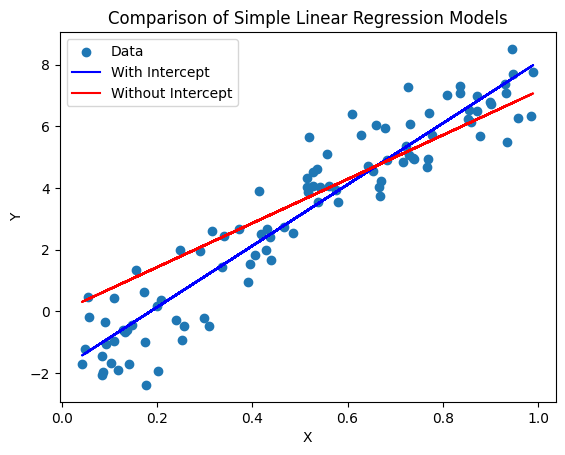

In [ ]:
plt.scatter(X, Y, label='Data')

# Line plot for the simple linear regression model with intercept
plt.plot(X, y_hat_with_intercept, label='With Intercept', color='blue')

# Line plot for the simple linear regression model without intercept
plt.plot(X, y_hat_without_intercept, label='Without Intercept', color='red')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of Simple Linear Regression Models')
plt.legend()
plt.show()
